In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [91]:
df = pd.read_csv('titanic_toy.csv')

In [93]:
df.sample(5)

,Age,Fare,Family,Survived
724,27.0,53.100,1,1
872,33.0,5.000,0,0
71,16.0,46.900,7,0
505,18.0,108.900,1,0
292,36.0,12.875,0,0


In [95]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [97]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [101]:

# x_train
# x_test
# y_train
# y_test

In [103]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [105]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [107]:
mean_age, median_age, mean_fare, median_fare

(29.78590425531915, 28.75, 32.61759689349112, 14.4583)

In [109]:
x_train['mean_age'] = x_train['Age'].fillna(mean_age)
x_train['median_age'] = x_train['Age'].fillna(median_age)

x_train['mean_fare'] = x_train['Fare'].fillna(mean_fare)
x_train['median_fare'] = x_train['Fare'].fillna(median_fare)

In [111]:
x_train.sample(5)

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
878,NaN,NaN,0,29.785904,28.75,32.617597,14.4583
221,27.0,13.00,0,27.000000,27.00,13.000000,13.0000
85,33.0,15.85,3,33.000000,33.00,15.850000,15.8500
613,NaN,7.75,0,29.785904,28.75,7.750000,7.7500
273,37.0,29.70,1,37.000000,37.00,29.700000,29.7000


In [113]:
print('Original age variable variance', x_train['Age'].var())
print('Age variance after mean imputation', x_train['mean_age'].var())
print('Age variance after median imputation', x_train['median_age'].var())

Original age variable variance 204.3495133904614
Age variance after mean imputation 161.81262452718673
Age variance after median imputation 161.9895663346054


In [115]:
print('Original fare variable variance', x_train['Fare'].var())
print('fare variance after mean imputation', x_train['mean_fare'].var())
print('fare variance after median imputation', x_train['median_fare'].var())

Original fare variable variance 2448.197913706318
fare variance after mean imputation 2324.2385256705547
fare variance after median imputation 2340.0910219753637


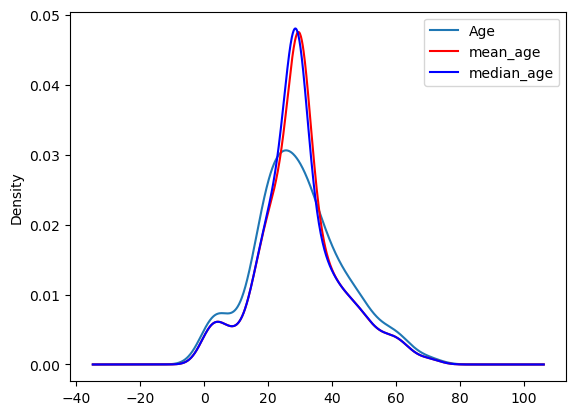

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Age'].plot(kind='kde',  ax=ax)
x_train['mean_age'].plot(kind='kde',  ax=ax, color='red')
x_train['median_age'].plot(kind='kde',  ax=ax, color='blue')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Using Sklearn

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [122]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [124]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
])
# trf

In [126]:
trf.fit(x_train)

ColumnTransformer(transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [128]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [134]:
trf.named_transformers_['imputer1'].statistics_
# trf.named_transformers_['imputer1'].statistics_


array([28.75])

In [136]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [138]:
x_train
# x_test

array([[ 40.    ,  27.7208],
       [  4.    ,  16.7   ],
       [ 47.    ,   9.    ],
       ...,
       [ 71.    ,  49.5042],
       [ 28.75  , 221.7792],
       [ 28.75  ,  25.925 ]])